# Gauss-Newton

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as pt
import scipy.linalg as la

We would like to fit the model $f(t) = x_0 e^{x_1 t}$ to the following data using Gauss-Newton:

In [2]:
t = np.array([0.0, 1.0, 2.0, 3.0])
y = np.array([2.0, 0.7, 0.3, 0.1])

First, define a residual function (as a function of $\mathbf x=(x_0, x_1)$)

In [3]:
def residual(x):
    return y - x[0] * np.exp(x[1] * t)

Next, define its Jacobian matrix:

In [11]:
def jacobian(x):
    return np.array([
        -np.exp(x[1] * t),
        -x[0] * t * np.exp(x[1] * t)
        ]).T

In [12]:
jacobian(np.array([1, 0]))

array([[-1., -0.],
       [-1., -1.],
       [-1., -2.],
       [-1., -3.]])

Here are two initial guesses. Try both:

Here's a plotting function to judge the quality of our guess:

Residual norm: 1.5459624833740306


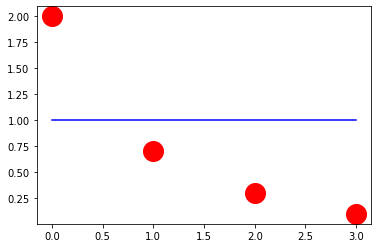

In [6]:
def plot_guess(x):
    pt.plot(t, y, 'ro', markersize=20, clip_on=False)
    T = np.linspace(t.min(), t.max(), 100)
    Y = x[0] * np.exp(x[1] * T)
    pt.plot(T, Y, 'b-')
    
    print("Residual norm:", la.norm(residual(x), 2))

plot_guess(x)

In [5]:
x = np.array([1, 0])
#x = np.array([0.4, 2])

Code up one iteration of Gauss-Newton. Use `numpy.linalg.lstsq()` to solve the least-squares problem, noting that that function returns a tuple--the first entry of which is the desired solution.

Also print the residual norm. Use `plot_iterate` to visualize the current guess.

Then evaluate this cell in-place many times (Ctrl-Enter):

Residual norm: 162.72704101675862
Residual norm: 11.46361041211416
Residual norm: 4.593133565552843
Residual norm: 2.1360711524228457
Residual norm: 1.5390038077925525
Residual norm: 1595.362194010699
Residual norm: 13.63781691175583
Residual norm: 5.347397014254215
Residual norm: 2.3037449572139694
Residual norm: 1.8416002469904356
Residual norm: 66.51991336539743
Residual norm: 7.90360262785168
Residual norm: 3.2889696870926897
Residual norm: 1.4379898673465328
Residual norm: 0.2718935615381445
Residual norm: 0.04487612316560588
Residual norm: 0.04467761237725359
Residual norm:

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 0.04467753304126531
Residual norm: 0.044677532987234064
Residual norm: 0.04467753298719709
Residual norm: 0.04467753298719699


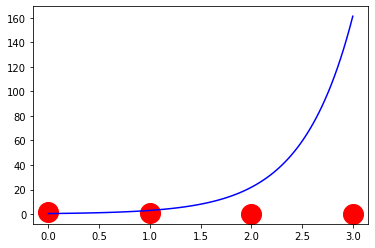

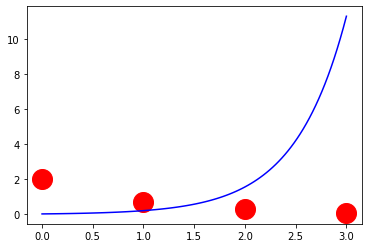

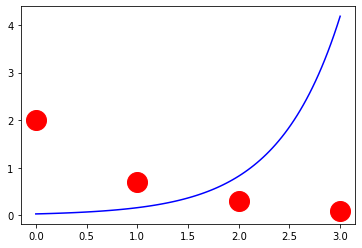

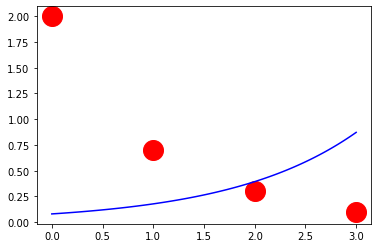

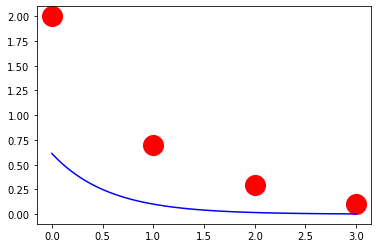

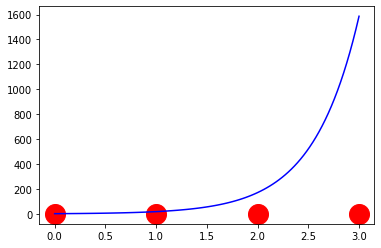

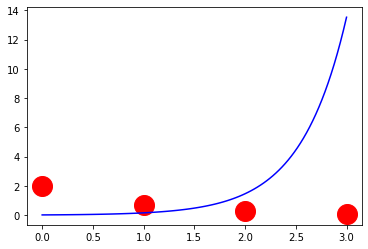

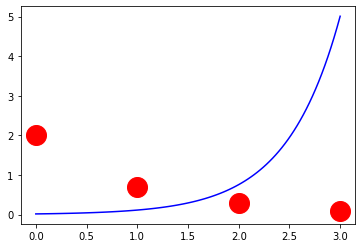

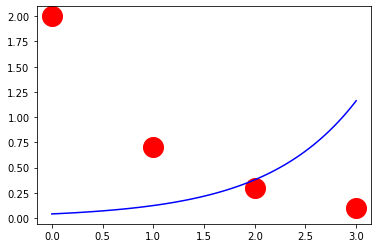

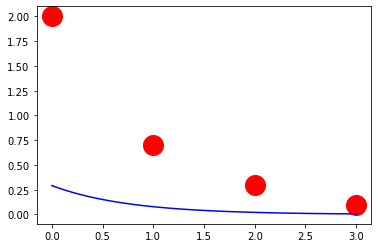

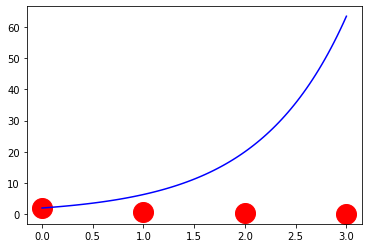

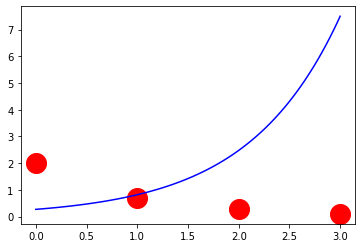

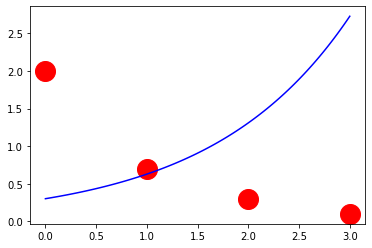

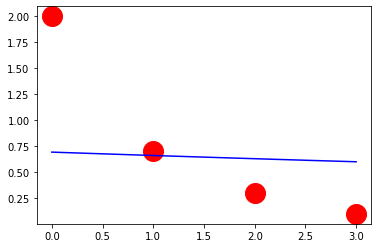

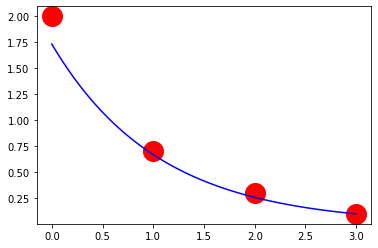

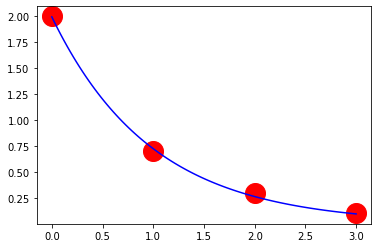

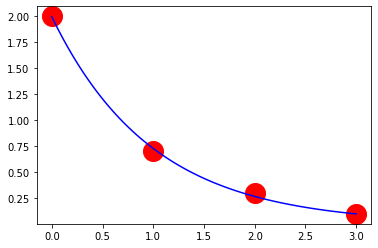

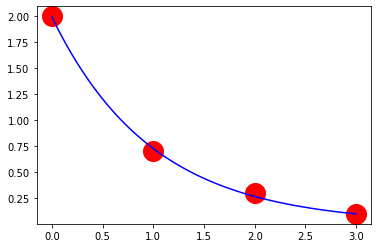

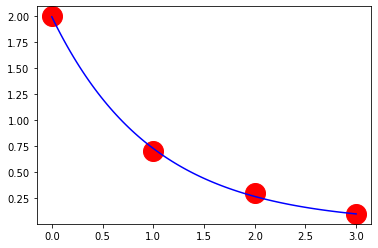

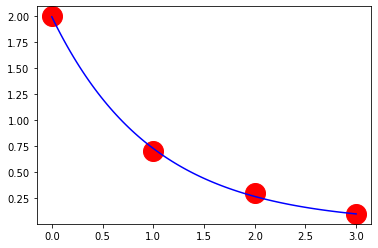

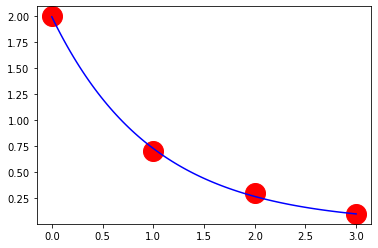

In [7]:
#x = np.array([1, 0])
x = np.array([0.4, 2])
pt.figure()
plot_guess(x)
for i in range(20):
    pt.figure()

    x = x + la.lstsq(jacobian(x), -residual(x))[0]

    plot_guess(x)

In [18]:
def residual(x):
    return y - (x[0] + x[1]*t + x[2]*t**2 + x[3]*t**3)

def jacobian(x):
    return np.array([
        -t**0,
        -t,
        -t**2,
        -t**3
        ]).T

def plot_guess(x):
    pt.plot(t, y, 'ro', markersize=20, clip_on=False)
    T = np.linspace(t.min(), t.max(), 100)
    Y = x[0] + x[1]*T + x[2]*T**2 + x[3]*T**3
    pt.plot(T, Y, 'b-')
    
    print("Residual norm:", la.norm(residual(x), 2))

Residual norm: 42.66134081343436
Residual norm: 1.537761591325876e-14
Residual norm: 8.068235998053638e-16
Residual norm: 3.6506759942727966e-16


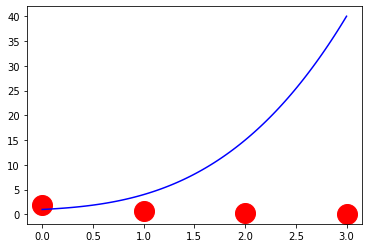

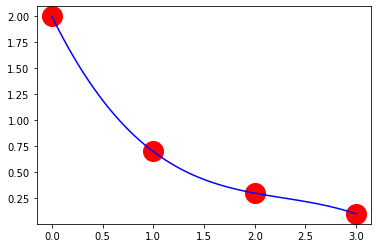

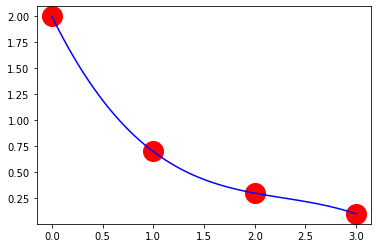

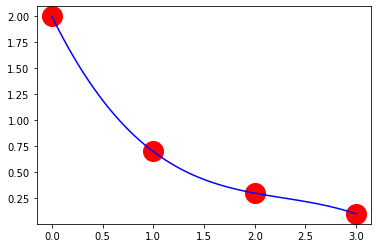

In [19]:
x = np.array([1,1,1,1])
pt.figure()
plot_guess(x)
for i in range(3):
    pt.figure()

    x = x + la.lstsq(jacobian(x), -residual(x))[0]

    plot_guess(x)